In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np

## Cargando Data

In [3]:
data = pd.read_csv('cod.csv')
data

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.400000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,ImranePROPG#2085215,0,51,0.432203,0,10,0,110,0,71,11,71.0,0,0,0,49935,0.0,0,118
1554,Miguel_mor#1492856,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1555,Trianthor#3462590,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1556,tinytrex594#3976133,0,0,0.000000,0,1,0,0,2,1,0,1.0,0,1,7,0,91.2,9,0


## Análisis Exploratorio

In [4]:
data.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1.558000e+03,1558.000000,1.558000e+03,1558.000000
mean,153.002567,3753.001926,0.637098,6.895379,44.414634,4.998074,47.657253,10330.189987,425.915918,630.672657,21.428416,116.695764,685.797176,45356.671374,8.726335e+05,107.868825,5.568677e+04,3875.397946
std,301.984766,7929.696675,0.430459,10.184677,68.318064,7.005778,51.626213,22954.104384,786.182499,1305.150393,82.640000,256.354836,1518.383825,97919.428339,1.795755e+06,116.526676,1.202811e+05,7992.666443
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,4.000000,0.261442,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.106250e+03,0.000000,0.000000e+00,14.000000
50%,10.000000,191.500000,0.732837,5.000000,11.000000,2.000000,14.000000,214.500000,51.000000,32.000000,3.031116,3.000000,36.500000,1307.500000,6.396800e+04,56.793995,1.565000e+03,269.000000
75%,168.000000,3445.750000,0.955293,12.000000,51.000000,8.000000,110.000000,9015.500000,485.500000,602.750000,9.085714,110.500000,609.750000,40906.750000,8.286690e+05,221.648976,5.078100e+04,3698.750000
max,3519.000000,66935.000000,3.000000,235.000000,435.000000,80.000000,117.000000,209851.000000,7479.000000,11719.000000,1349.000000,3745.000000,14531.000000,965775.000000,1.497054e+07,413.800000,1.166620e+06,67888.000000


In [5]:
data.isna().sum().sum()

0

In [6]:
data.corr()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
wins,1.000000,0.900201,0.386612,0.496721,0.845055,0.632532,0.392511,0.853138,0.934991,0.867875,-0.071429,0.931809,0.842728,0.879621,0.829105,0.340977,0.878899,0.912530
kills,0.900201,1.000000,0.406106,0.504433,0.875606,0.623952,0.371014,0.956512,0.881143,0.976575,-0.073888,0.920272,0.958100,0.947597,0.875062,0.353855,0.953966,0.983574
kdRatio,0.386612,0.406106,1.000000,0.504753,0.513195,0.512484,0.389929,0.380265,0.413756,0.419661,0.072248,0.361056,0.367282,0.369224,0.426856,0.451102,0.373149,0.373437
killstreak,0.496721,0.504433,0.504753,1.000000,0.534950,0.569522,0.294850,0.482832,0.486061,0.513845,-0.092810,0.472495,0.469738,0.477543,0.458867,0.451865,0.480904,0.490072
level,0.845055,0.875606,0.513195,0.534950,1.000000,0.665629,0.512850,0.797220,0.938933,0.880610,0.059675,0.774408,0.817353,0.803272,0.969955,0.263510,0.806073,0.861555
losses,0.632532,0.623952,0.512484,0.569522,0.665629,1.000000,0.358865,0.599764,0.634742,0.627122,-0.076287,0.657998,0.603573,0.600885,0.588177,0.493834,0.603631,0.621198
prestige,0.392511,0.371014,0.389929,0.294850,0.512850,0.358865,1.000000,0.327667,0.473250,0.374914,0.207348,0.336447,0.344325,0.336664,0.442993,0.013098,0.336605,0.376481
hits,0.853138,0.956512,0.380265,0.482832,0.797220,0.599764,0.327667,1.000000,0.812103,0.937531,-0.097044,0.900000,0.973379,0.968216,0.789628,0.381123,0.979051,0.945092
timePlayed,0.934991,0.881143,0.413756,0.486061,0.938933,0.634742,0.473250,0.812103,1.000000,0.865555,0.029985,0.869010,0.821605,0.836810,0.932366,0.245996,0.836215,0.889276
headshots,0.867875,0.976575,0.419661,0.513845,0.880610,0.627122,0.374914,0.937531,0.865555,1.000000,-0.068719,0.878931,0.938885,0.915486,0.876730,0.343639,0.924202,0.955821


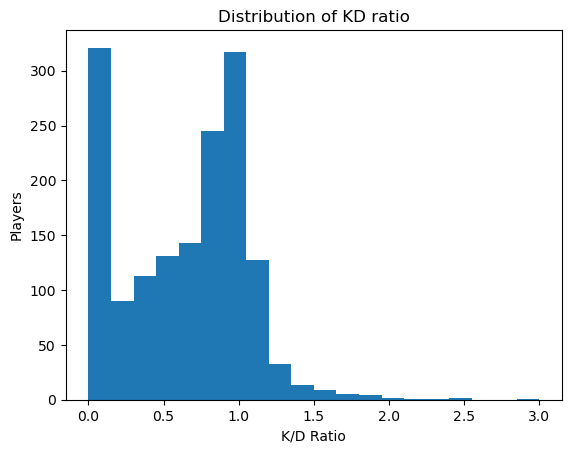

In [15]:
plt.hist(data['kdRatio'], bins = 20)
plt.title('Distribution of KD ratio')
plt.ylabel('Players')
plt.xlabel('K/D Ratio')
plt.show()

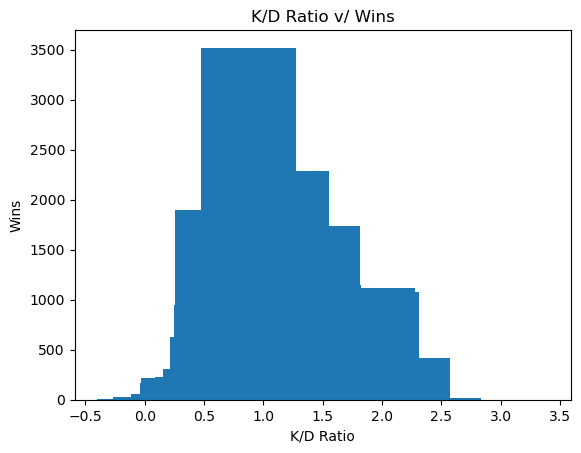

In [30]:
plt.bar(data['kdRatio'], data['wins'])
plt.title('K/D Ratio v/ Wins')
plt.ylabel('Wins')
plt.xlabel('K/D Ratio')
plt.show()

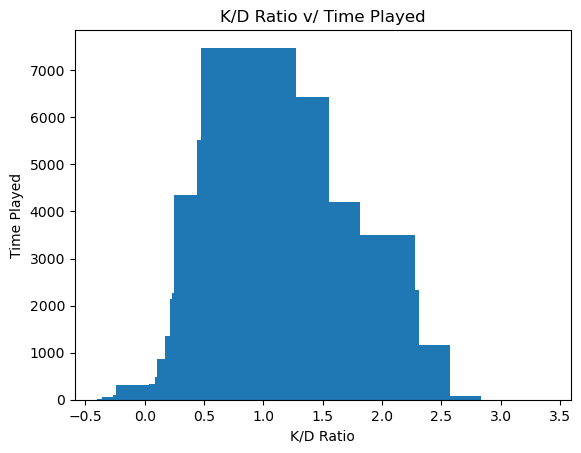

In [31]:
plt.bar(data['kdRatio'], data['timePlayed'])
plt.title('K/D Ratio v/ Time Played')
plt.ylabel('Time Played')
plt.xlabel('K/D Ratio')
plt.show()

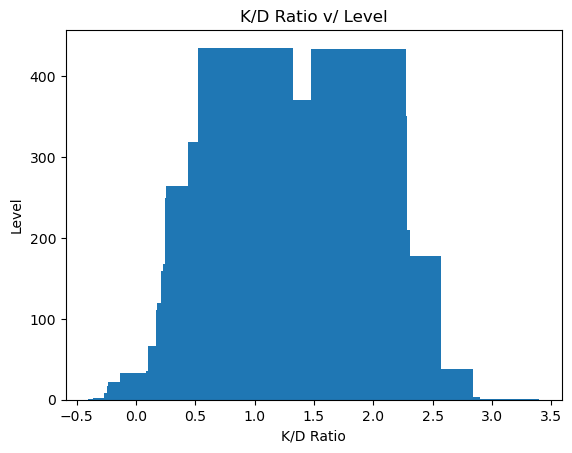

In [33]:
plt.bar(data['kdRatio'], data['level'])
plt.title('K/D Ratio v/ Level')
plt.ylabel('Level')
plt.xlabel('K/D Ratio')
plt.show()

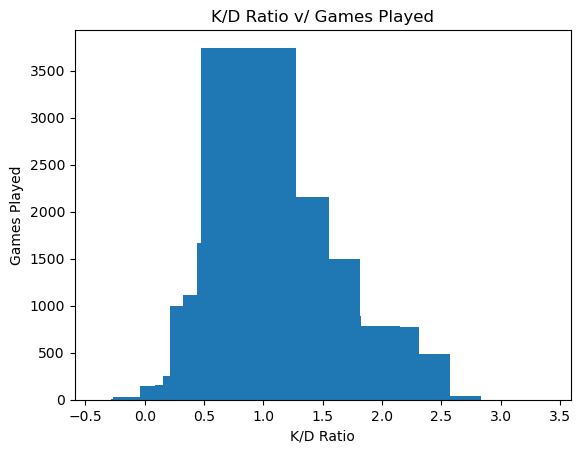

In [35]:
plt.bar(data['kdRatio'], data['gamesPlayed'])
plt.title('K/D Ratio v/ Games Played')
plt.ylabel('Games Played')
plt.xlabel('K/D Ratio')
plt.show()

## Feature selection y datasets de entrenamiento/prueba

## Construyendo el modelo